In [2]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Data/graph_extractor.csv")

In [4]:
df.head()

,ticker,recommendation,target_achieve_duration,Author,Publish Date
0,gtbl,buy,3 years,Rahul Jain,2023-07-30
1,sbin,buy,3 years,Rahul Jain,2023-06-18
2,itc,buy,3 years,Rahul Jain,2023-06-18
3,tcs,buy,3 years,Rahul Jain,2023-06-18
4,TCS,buy,3 years,Rahul Jain,2023-08-09


In [5]:
df_new = df.copy()

In [6]:
def binary(x):
    if x == "buy":
        return 0
    else:
        return 1

In [7]:
df_new["ticker"] = df_new["ticker"].apply(lambda x: x.upper())
df_new["binary_recommendation"] = df_new["recommendation"].apply(lambda x: binary(x))
df_new["correctness"] = [random.random() for i in range(len(df))]

In [8]:
df_new.head()

,ticker,recommendation,target_achieve_duration,Author,Publish Date,binary_recommendation,correctness
0,GTBL,buy,3 years,Rahul Jain,2023-07-30,0,0.288852
1,SBIN,buy,3 years,Rahul Jain,2023-06-18,0,0.523625
2,ITC,buy,3 years,Rahul Jain,2023-06-18,0,0.044493
3,TCS,buy,3 years,Rahul Jain,2023-06-18,0,0.556817
4,TCS,buy,3 years,Rahul Jain,2023-08-09,0,0.682738


In [9]:
f = df["ticker"].unique().tolist()
company_names = list(set([i.upper() for i in f]))
author_names = df["Author"].unique().tolist()
correctness = [random.random() for i in range(len(df))]
dates = df["Publish Date"].tolist()

In [10]:
len(company_names), len(author_names)

(54, 3)

In [11]:
G = nx.from_pandas_edgelist(df_new, source = 'Author', target = 'ticker', edge_attr = 'correctness')

In [12]:
G.nodes, G.edges

(NodeView(('Rahul Jain', 'GTBL', 'SBIN', 'ITC', 'TCS', 'HCL', 'SUN PHARMACEUTICAL', 'CIPLA', "DR REDDY'S LABORATORY", 'BHARAT ELECTRONICS LIMITED', 'Akshat Shrivastava', 'HDFC', 'AAPL', 'Sahil Bhadviya', 'KPIT', 'FLINDIA', 'MAPMYINDIA', 'DIXON', 'MTAR', 'IDFCFIRST', 'GOKULD', 'AVAS', 'PRAJ', 'NEWGEN', 'GARWARE', 'GMM', 'SUPRAJIT', 'MOLDTEK', 'AMRUTANJAN', 'GALAXY', 'FINEORGANICS', 'ALKYLAMINE', 'PAUSHAK', 'MASFINANCIAL', 'AVASFINANCIAL', 'TARSONS', 'VIJAYADIAGNOSTIC', 'HOMEFIRST', 'PRUDENT', 'ULTRAMARINE', 'VMART', 'ICICI', 'KOTAK MAHINDRA', 'AVAS FINANCIALS', 'SBI CARDS', 'RAJESH EXPORTS', 'UI PATH', 'G1 SMALL FINANCE', 'DICK JAM', 'ADHINATH TEXTILES', 'PRIDECOM GROUP', 'CEREBRAL INTEGRATED', 'NGL FINE CHEMICAL', 'JUTI RESINS', 'RELIANCE', 'RELAXO', 'BATA')),
 EdgeView([('Rahul Jain', 'GTBL'), ('Rahul Jain', 'SBIN'), ('Rahul Jain', 'ITC'), ('Rahul Jain', 'TCS'), ('Rahul Jain', 'HCL'), ('Rahul Jain', 'SUN PHARMACEUTICAL'), ('Rahul Jain', 'CIPLA'), ('Rahul Jain', "DR REDDY'S LABORATORY"

[]

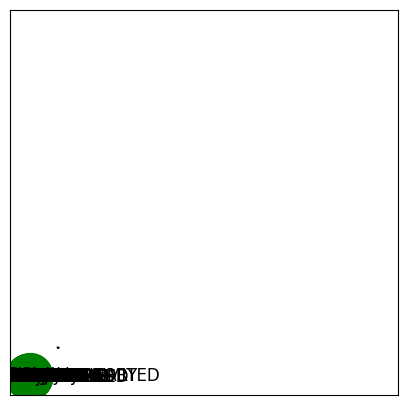

In [22]:
plt.figure(figsize=(5,5)) 
nx.draw_networkx(G,
    pos = nx.kamada_kawai_layout(G, weight = 'correctness'), 
    node_size = 700,
    node_color = "green",
    width = [G.edges[e]['correctness'] for e in G.edges],
    with_labels = True)
plt.plot()